# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
# Import neccessarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file into a dataframe
df = pd.read_csv('diabetes.csv')

In [3]:
# Generate descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Average age = 33.24
- Average BMI = 31.99

In [4]:
# Display summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Output the dimensions of the dataframe
df.shape

(768, 9)

In [6]:
# Count the number of missing values in each column of the dataframe
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
def is_zero(feature):
    """
    Counts the occurrences of zero values in the specified feature within the DataFrame 'df'.

    Parameters:
    - feature: Name of the feature (column) in the DataFrame 'df' to check for zero values.

    Returns:
    - count: The number of occurrences where the specified feature's values are equal to zero.
    """
    return (df[feature]==0).sum()


def column_percentage(feature):
    """
    Calculates the percentage of zero values in a specified column within the DataFrame 'df'.

    Parameters:
    - feature: Name of the column in the DataFrame 'df'.

    Returns:
    - percentage: The percentage of occurrences where the specified column's values are equal to zero.
    """
    return (df[feature] == 0).sum()/df[feature].count() * 100

def count_values(feature):
    """
    Counts the occurrences of unique values in a specified column within the DataFrame 'df'.

    Parameters:
    - feature: Name of the column in the DataFrame 'df'.

    Returns:
    - value_counts: Series showing the count of each unique value in the specified column.
    """
    return df[feature].value_counts()

In [8]:
# Iterate through each feature column in the DataFrame 'df', except the last one, and count the occurrences of zero values
# Print the feature name and the count of zero occurrences for each feature
for feature in df.columns[:-1]:
    print(f'{feature}: {is_zero(feature)}')

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [9]:
# Iterate through each feature column in the DataFrame 'df', excluding the last three columns
# Calculate and print the percentage of zero occurrences for each feature
for feature in df.columns[:-3]:
    print(f'{feature}: {round(column_percentage(feature), 2)}%')

Pregnancies: 14.45%
Glucose: 0.65%
BloodPressure: 4.56%
SkinThickness: 29.56%
Insulin: 48.7%
BMI: 1.43%


In [10]:
# Display the first few rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Display the last few rows of the dataframe
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
# Display a random sample of 5 rows from the dataframe
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
466,0,74,52,10,36,27.8,0.269,22,0
585,1,93,56,11,0,22.5,0.417,22,0
722,1,149,68,29,127,29.3,0.349,42,1
474,4,114,64,0,0,28.9,0.126,24,0
231,6,134,80,37,370,46.2,0.238,46,1


<Axes: >

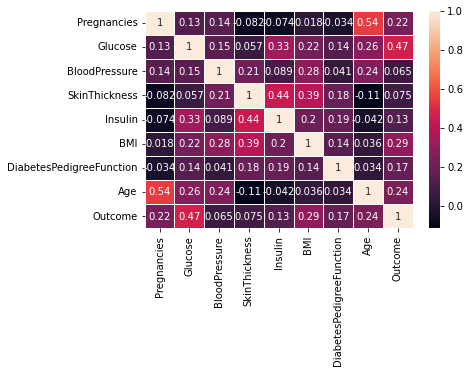

In [13]:
# Display a heatmap showing the correlation matrix of the DataFrame
# Include annotations and set the linewidth between cells to 0.5
sns.heatmap(df.corr(), annot=True, linewidth=.5)

- Glucose has the highest correlation with Outcome

In [14]:
def hist_plot(df, column):
    """
    Display a histogram plot for a specified column within the DataFrame 'df'.

    Parameters:
    - df: DataFrame containing the dataset.
    - column: Name of the column in the DataFrame 'df' to be plotted.
    """
    sns.histplot(df, x=column)
    plt.title(column, fontsize=16)

    
def multi_hist_plot(df, column, axis):
    """
    Display a histogram plot for a specified column within the DataFrame on a specified axis.

    Parameters:
    - df: DataFrame containing the dataset.
    - column: Name of the column in the DataFrame 'df' to be plotted.
    - axis: Axis on which to plot the histogram.

    Returns:
    - None
    """
    sns.histplot(df, x=column, ax=axes[axis])

    
def box_plot(column):
    """
    Display a boxplot for a specified column within the DataFrame 'df'.

    Parameters:
    - data: Name of the column in the DataFrame 'df' for which a boxplot will be created.
    """
    sns.boxplot(df[column])
    plt.title(data, fontsize=16)


def multi_box_plot(df, column, axis):
    """
    Display a boxplot for a specified column within the DataFrame 'df' on a specified axis.

    Parameters:
    - df: DataFrame containing the dataset.
    - column: Name of the column in the DataFrame 'df' to be plotted.
    - axis: Axis on which to plot the boxplot.
    """
    sns.boxplot(df, x=column, ax=axes[axis])


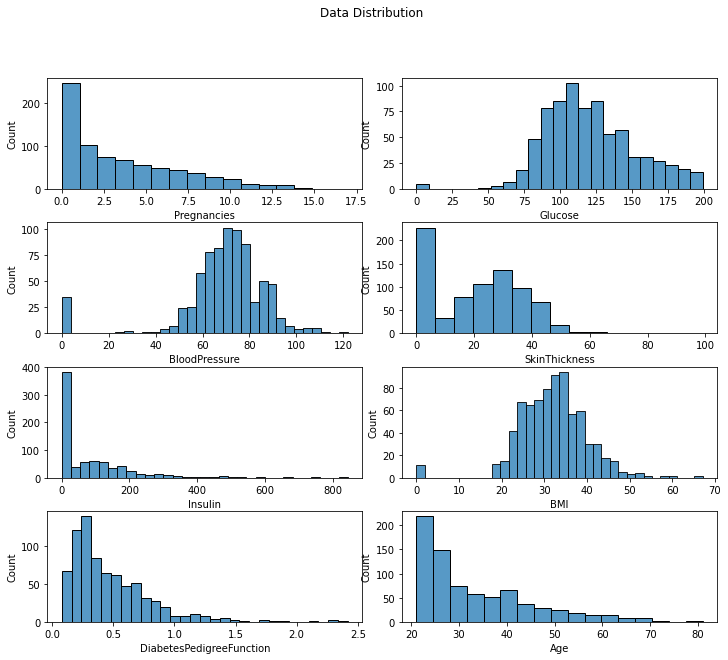

In [15]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.125)
fig.suptitle('Data Distribution')

# List of axis positions for each subplot
axis_list = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1)]

# Iterate through the columns of the DataFrame to create multiple histogram plots on different subplots
for x in range(len(df.columns[:-1])):
    multi_hist_plot(df, df.columns[x], axis_list[x])


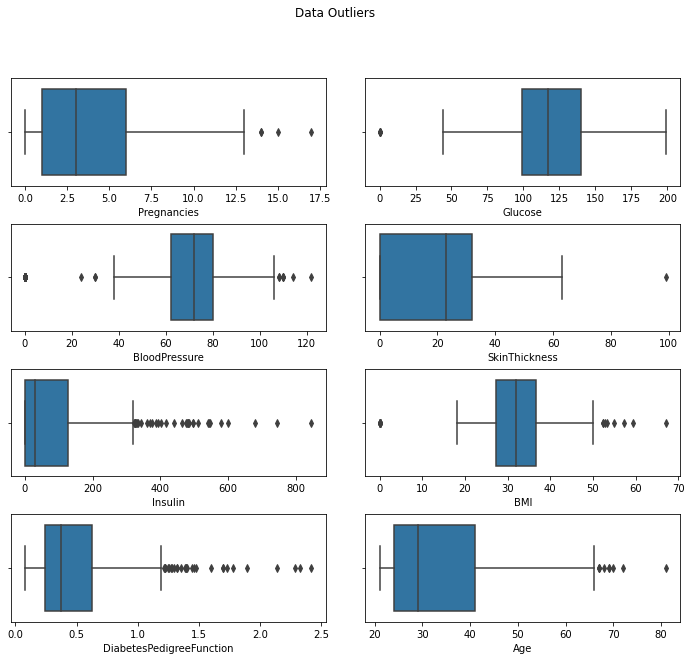

In [16]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.35, wspace=0.125)
fig.suptitle('Data Outliers')

# Iterate through the columns of the DataFrame to create multiple box plots on different subplots
for x in range(len(df.columns[:-1])):
    multi_box_plot(df, df.columns[x], axis_list[x])


In [17]:
# Separating data into two groups based on 'Outcome' column: 
# 'diabetes_no' for entries with Outcome value 0 and 'diabetes_yes' for entries with Outcome value 1
diabetes_no = df[df['Outcome'] == 0]
diabetes_yes = df[df['Outcome'] == 1]

In [18]:
# Display descriptive statistics
diabetes_yes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [19]:
# Display descriptive statistics
diabetes_no.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


- Average age with diabetes = 37
- Average age without diabetes = 31
- Average BMI with diabetes = 35
- Average BMI without diabetes = 30
- Average Blood Glucose with diabetes = 141.25
- Average Blood Glucose without diabetes = 109.98


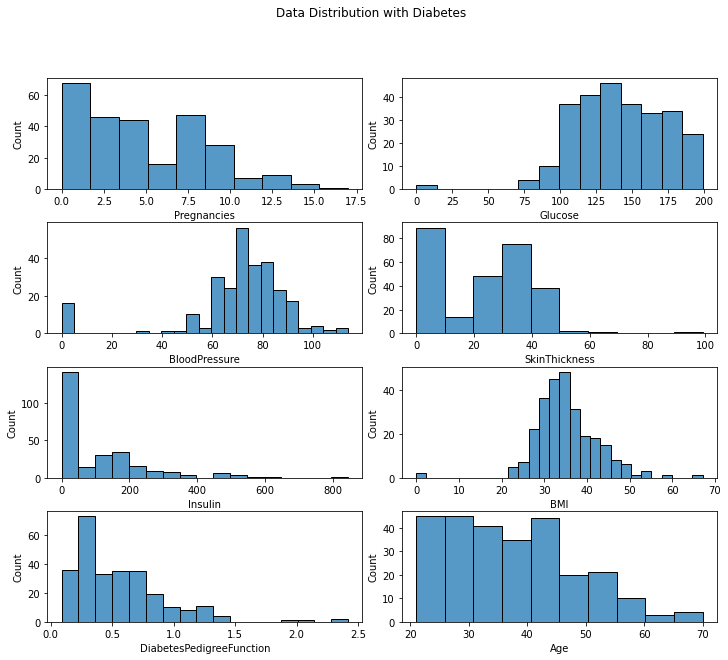

In [20]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.125)
fig.suptitle('Data Distribution with Diabetes')

# Iterate through the columns of the DataFrame (excluding the last one) to create multiple histogram plots
for x in range(len(df.columns[:-1])):
    multi_hist_plot(diabetes_yes, df.columns[x], axis_list[x])


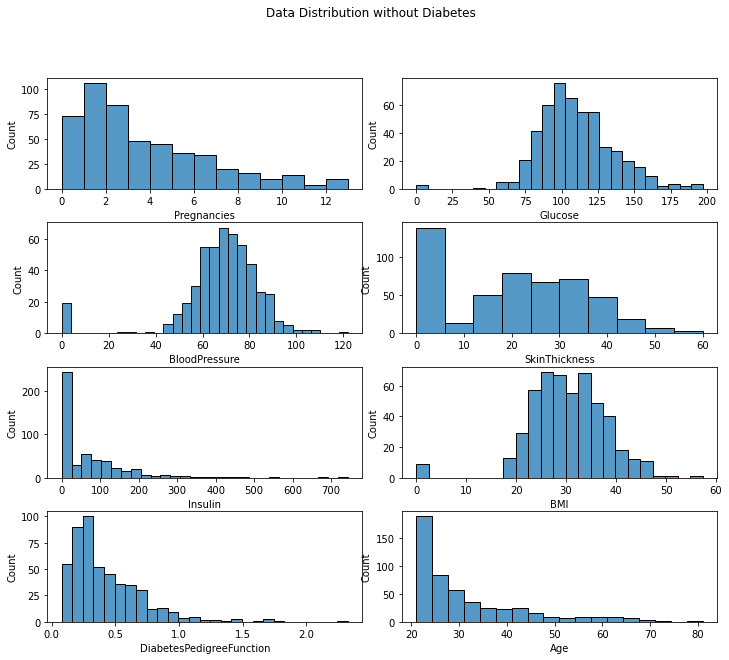

In [21]:
# Create subplots with a 4x2 grid layout and set the overall figure size
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Adjust spacing between subplots and set the title for the entire figure
fig.subplots_adjust(hspace=0.30, wspace=0.125)
fig.suptitle('Data Distribution without Diabetes')

# Iterate through the columns of the DataFrame (excluding the last one) to create multiple histogram plots
for x in range(len(df.columns[:-1])):
    multi_hist_plot(diabetes_no, df.columns[x], axis_list[x])


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

**Missing Values**
- Pregnancies: 14.45%
- Glucose: 0.65%
- BloodPressure: 4.56%
- SkinThickness: 29.56%
- Insulin: 48.7%
- BMI: 1.43%

Decided to drop Insulin column as almost half the values are missing, and based on an earlier heatmap, there is little correlation between Insulin and the Outcome variable.

In [22]:
# Create feature matrix X by dropping 'Outcome' and 'Insulin' columns
X = df.drop(columns=['Outcome', 'Insulin'])

# Create target variable y containing the values from the 'Outcome' column
y = df['Outcome']

In [23]:
# Importing VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

# Instantiate VarianceThreshold to remove low-variance features (threshold set to 0.1)
vt = VarianceThreshold(0.1)

# Fit and transform the feature matrix X using VarianceThreshold
X_transformed = vt.fit_transform(X)

# Get the selected columns after applying the VarianceThreshold
selected_columns = X.columns[vt.get_support()]

# Update the feature matrix X with only the selected columns
X = pd.DataFrame(X_transformed, columns=selected_columns)


In [24]:
# Importing necessary modules and functions for feature selection
from sklearn.feature_selection import f_regression, SelectKBest

# Instantiate SelectKBest using f_regression as the scoring function
skb = SelectKBest(f_regression, k=3)

# Fit the SelectKBest object on feature matrix X and target variable y to identify the best features
best_features = skb.fit_transform(X, y)

# Retrieve the selected features using get_support and identify their column names
selected_features = X.columns[skb.get_support()]

# Update the feature matrix X with only the selected features
X = pd.DataFrame(best_features, columns=selected_features)


In [25]:
X

,Glucose,BMI,Age
0,148.0,33.6,50.0
1,85.0,26.6,31.0
2,183.0,23.3,32.0
3,89.0,28.1,21.0
4,137.0,43.1,33.0
...,...,...,...
763,101.0,32.9,63.0
764,122.0,36.8,27.0
765,121.0,26.2,30.0
766,126.0,30.1,47.0


In [26]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets: X_train, X_test, y_train, y_test
# Test size is set to 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [27]:
def replace_zeroes(df):
    """
    Replace zero values in specific features of the DataFrame with NaN.

    Parameters:
    - df: DataFrame in which zero values in selected features will be replaced.
    """
    feature_list = ['Glucose', 'BMI']
    for entry in feature_list:
        df[entry].replace(0, np.nan, inplace=True)


In [28]:
# Create a list containing training and testing sets
df_list = [X_train, X_test]

# Iterate through the list to replace zero values in specific features with NaN
for x in range(2):
    replace_zeroes(df_list[x])


In [29]:
# Importing KNNImputer for imputing missing values using K-Nearest Neighbors
from sklearn.impute import KNNImputer

# Creating a KNNImputer object with 3 nearest neighbors
imputer = KNNImputer(n_neighbors=3)

# Impute missing values separately for training and testing sets
After_imputation_train = imputer.fit_transform(X_train)
After_imputation_test = imputer.fit_transform(X_test)

# Update the training and testing sets with imputed values, ensuring the columns remain the same
X_train = pd.DataFrame(After_imputation_train, columns=X_train.columns)
X_test = pd.DataFrame(After_imputation_test, columns=X_test.columns)


In [30]:
# Calculate and print the skewness for each feature in the X_train dataset
for feature in X_train.columns:
    print(f'{feature} : {X_train[feature].skew()}')

Glucose : 0.5800562129899696
BMI : 0.6363506399190686
Age : 1.1693076371600555


   **Skewness**
- Glucose : 0.5800562129899696
- BMI : 0.6363506399190686
- Age : 1.1693076371600555

In [56]:
def iqr_high(df, feature):
    """
    Calculate the upper bound outlier threshold using the IQR (Interquartile Range) method for a specific feature.

    Parameters:
    - df: DataFrame containing the data.
    - feature: Name of the feature (column) in the DataFrame.

    Returns:
    - high: Upper bound threshold for outlier detection based on the IQR method.
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5 * iqr
    return high



def iqr_low(df, feature):
    """
    Calculate the lower bound outlier threshold using the IQR (Interquartile Range) method.

    Parameters:
    - df: DataFrame containing the data.
    - feature: Name of the feature (column) in the training set (X_train).

    Returns:
    - low: Lower bound threshold for outlier detection based on the IQR method.
    """
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    return low


In [32]:
# List of features for outlier treatment
feature_list = ['Glucose', 'BMI']

# Iterate through specified features to handle outliers
for feature in feature_list:
    # Calculate the median for the specific feature in the training and test sets
    train_median = X_train[feature].median()
    test_median = X_test[feature].median()
    
    # Replace values higher than the upper outlier threshold with the feature's median in both sets
    X_train.loc[X_train[feature] > iqr_high(X_train, feature), feature] = train_median
    X_test.loc[X_test[feature] > iqr_high(X_test, feature), feature] = test_median
    
    # Replace values lower than the lower outlier threshold with the feature's median in both sets
    X_train.loc[X_train[feature] < iqr_low(X_train, feature), feature] = train_median
    X_test.loc[X_test[feature] < iqr_low(X_test, feature), feature] = test_median


- replaced outliers with the median on all columns except for the Age column as it has what i would consider to be valid/realistic outliers

In [65]:
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Instantiate separate StandardScaler objects for training and test sets
train_scaler = StandardScaler()
test_scaler = StandardScaler()

# Scale the training set (X_train) and transform its features using the training scaler
X_train_scaled = train_scaler.fit_transform(X_train)

# Update the X_train DataFrame with scaled features using the training scaler
X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

# Scale the test set (X_test) using its dedicated scaler and transform its features
X_test_scaled = test_scaler.fit_transform(X_test)

# Update the X_test DataFrame with scaled features using the test scaler
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)


In [64]:
X_train

,Glucose,BMI,Age
0,-0.894489,-1.245532,-0.948610
1,-0.559243,0.736173,-0.434667
2,0.446495,1.559342,-0.777296
3,0.312397,0.156905,-0.434667
4,-0.626292,1.711781,-0.006380
...,...,...,...
532,0.580594,-0.529070,-0.605981
533,-0.860965,-1.474191,-0.520324
534,-0.693342,2.062391,0.421906
535,0.647643,1.574586,-0.349009


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import warnings

In [67]:
diabetes_lr = LogisticRegression()
diabetes_lr.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_prob = diabetes_lr.predict_proba(X_test)[:, 1]
y_pred = diabetes_lr.predict(X_test)

In [69]:
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_prob)))
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

AUC = 0.77401
Accuracy = 0.72294
Precision = 0.61111
Recall = 0.55000
F1 score = 0.57895
[[123  28]
 [ 36  44]]


In [70]:
params = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 1500, 2500, 5000]
    }
]

In [71]:
from sklearn.model_selection import GridSearchCV
log_grid = GridSearchCV(diabetes_lr, param_grid = params, cv = 3, verbose=True)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    best_log = log_grid.fit(X_train,y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


In [72]:
best_log.best_params_

{'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [73]:
best_lg = best_log.best_estimator_

In [75]:
best_lg_prob = best_lg.predict_proba(X_test)[:, 1]
best_lg_pred = best_lg.predict(X_test)

In [76]:
print('AUC = {:.5f}'.format(roc_auc_score(y_test, best_lg_prob)))
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, best_lg_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, best_lg_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, best_lg_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, best_lg_pred)))
print(confusion_matrix(y_test, best_lg_pred))

AUC = 0.77376
Accuracy = 0.73160
Precision = 0.63636
Recall = 0.52500
F1 score = 0.57534
[[127  24]
 [ 38  42]]


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
diabetes_rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [79]:
diabetes_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [80]:
rfc_prob = diabetes_rfc.predict_proba(X_test)[:, 1]
rfc_pred = diabetes_rfc.predict(X_test)

In [81]:
print('AUC = {:.5f}'.format(roc_auc_score(y_test, rfc_prob)))
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, rfc_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, rfc_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, rfc_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, rfc_pred)))
print(confusion_matrix(y_test, rfc_pred))

AUC = 0.80116
Accuracy = 0.75325
Precision = 0.64935
Recall = 0.62500
F1 score = 0.63694
[[124  27]
 [ 30  50]]


In [82]:
rfc_params = {'n_estimators':[10, 25, 50, 100, 150, 200, 250, 300, 350, 2000],
              'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [83]:
rfc_grid = GridSearchCV(diabetes_rfc, param_grid = rfc_params, cv = 4, verbose=True)

In [52]:
best_rfc = rfc_grid.fit(X_train, y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


In [53]:
best_randomforest = best_rfc.best_estimator_

In [54]:
best_rfc_prob = best_randomforest.predict_proba(X_test)[:, 1]
best_rfc_pred = best_randomforest.predict(X_test)

In [55]:
print('AUC = {:.5f}'.format(roc_auc_score(y_test, best_rfc_prob)))
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, best_rfc_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, best_rfc_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, best_rfc_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, best_rfc_pred)))
print(confusion_matrix(y_test, best_rfc_pred))

AUC = 0.78994
Accuracy = 0.74459
Precision = 0.67797
Recall = 0.50000
F1 score = 0.57554
[[132  19]
 [ 40  40]]


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.